In [1]:
import os

new_directory = '/home/jovyan/workspace/Platform_test'
os.chdir(new_directory)

cwd = os.getcwd()
print(cwd)

/home/jovyan/workspace/Platform_test


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('Data/titanic.csv')
data = data.rename(columns = {'SibSp':'family_members','Parch':'parents','Embarked':'port'})

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,family_members,parents,Ticket,Fare,Cabin,port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data = data[['PassengerId','Pclass','Sex','Age','family_members','parents','Fare','Cabin','port','Survived']]
data.head()

,PassengerId,Pclass,Sex,Age,family_members,parents,Fare,Cabin,port,Survived
0,1,3,male,22.0,1,0,7.2500,NaN,S,0
1,2,1,female,38.0,1,0,71.2833,C85,C,1
2,3,3,female,26.0,0,0,7.9250,NaN,S,1
3,4,1,female,35.0,1,0,53.1000,C123,S,1
4,5,3,male,35.0,0,0,8.0500,NaN,S,0


In [19]:
data2 = pd.get_dummies(data, columns=['Pclass','Sex','port'], drop_first=True)
data2.head(10)


,PassengerId,Age,family_members,parents,Fare,Cabin,Survived,Pclass_2,Pclass_3,Sex_male,port_Q,port_S
0,1,22.0,1,0,7.2500,NaN,0,0,1,1,0,1
1,2,38.0,1,0,71.2833,C85,1,0,0,0,0,0
2,3,26.0,0,0,7.9250,NaN,1,0,1,0,0,1
3,4,35.0,1,0,53.1000,C123,1,0,0,0,0,1
4,5,35.0,0,0,8.0500,NaN,0,0,1,1,0,1
5,6,NaN,0,0,8.4583,NaN,0,0,1,1,1,0
6,7,54.0,0,0,51.8625,E46,0,0,0,1,0,1
7,8,2.0,3,1,21.0750,NaN,0,0,1,1,0,1
8,9,27.0,0,2,11.1333,NaN,1,0,1,0,0,1
9,10,14.0,1,0,30.0708,NaN,1,1,0,0,0,0


## EDA

In [15]:
data2.describe()

,PassengerId,Age,family_members,parents,Fare,Survived,Pclass_2,Pclass_3,Sex_male,port_Q,port_S
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208,0.383838,0.206510,0.551066,0.647587,0.086420,0.722783
std,257.353842,14.526497,1.102743,0.806057,49.693429,0.486592,0.405028,0.497665,0.477990,0.281141,0.447876
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,668.500000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


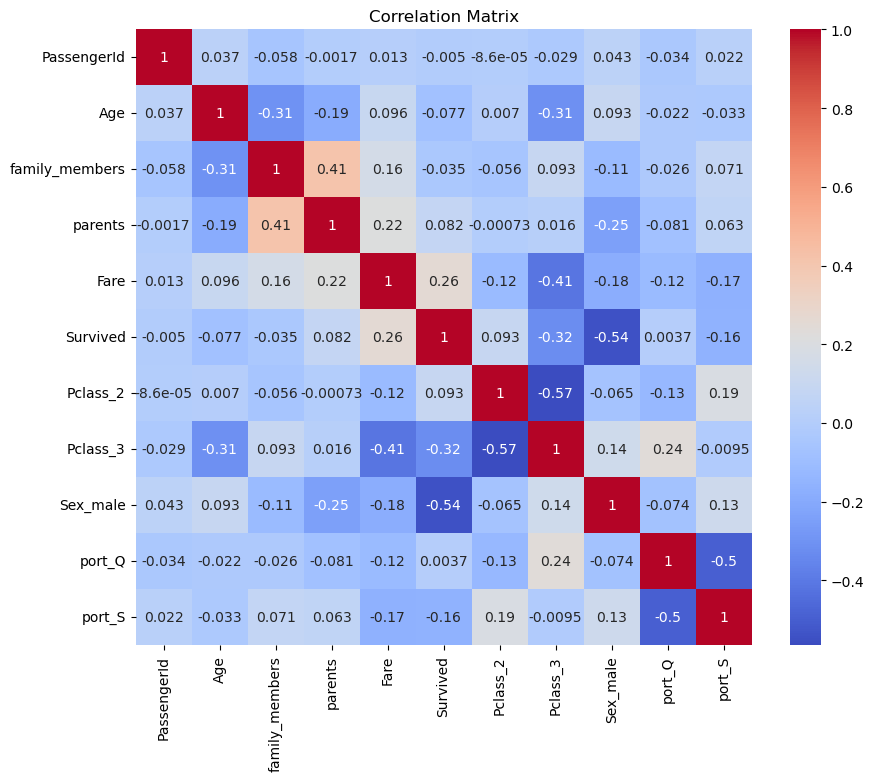

In [17]:
correlation_matrix = data2.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Add title and display the plot
plt.title('Correlation Matrix')
plt.show()

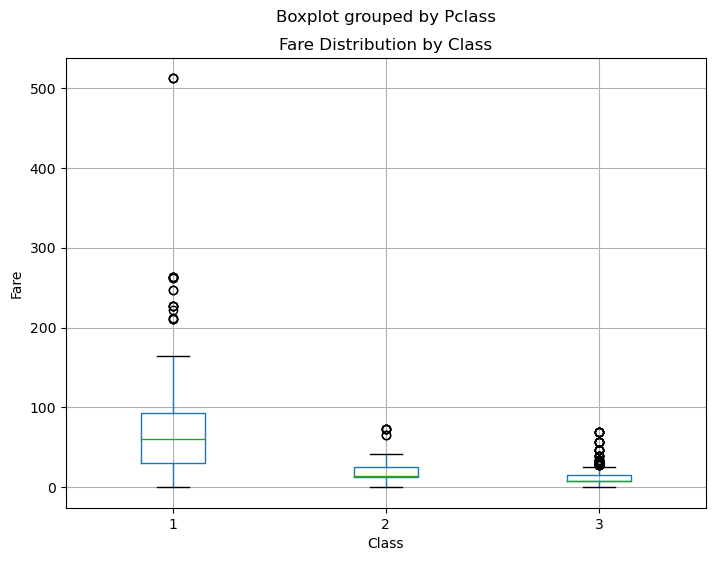

In [18]:
data.boxplot(column='Fare', by='Pclass', figsize=(8, 6))

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Fare')
plt.title('Fare Distribution by Class')

# Display the plot
plt.show()

In [23]:
data2.isna().any()

PassengerId       False
Age               False
family_members    False
parents           False
Fare              False
Cabin              True
Survived          False
Pclass_2          False
Pclass_3          False
Sex_male          False
port_Q            False
port_S            False
dtype: bool

In [21]:
data2.head()

,PassengerId,Age,family_members,parents,Fare,Cabin,Survived,Pclass_2,Pclass_3,Sex_male,port_Q,port_S
0,1,22.0,1,0,7.2500,NaN,0,0,1,1,0,1
1,2,38.0,1,0,71.2833,C85,1,0,0,0,0,0
2,3,26.0,0,0,7.9250,NaN,1,0,1,0,0,1
3,4,35.0,1,0,53.1000,C123,1,0,0,0,0,1
4,5,35.0,0,0,8.0500,NaN,0,0,1,1,0,1


In [22]:
data2['Age'] = data2['Age'].fillna(data2['Age'].mean())

In [27]:
data2 = data2.drop('Cabin', axis = 1)

In [28]:
data2.head()

,PassengerId,Age,family_members,parents,Fare,Survived,Pclass_2,Pclass_3,Sex_male,port_Q,port_S
0,1,22.0,1,0,7.2500,0,0,1,1,0,1
1,2,38.0,1,0,71.2833,1,0,0,0,0,0
2,3,26.0,0,0,7.9250,1,0,1,0,0,1
3,4,35.0,1,0,53.1000,1,0,0,0,0,1
4,5,35.0,0,0,8.0500,0,0,1,1,0,1


In [30]:
data2.columns

Index(['PassengerId', 'Age', 'family_members', 'parents', 'Fare', 'Survived',
       'Pclass_2', 'Pclass_3', 'Sex_male', 'port_Q', 'port_S'],
      dtype='object')

## Model Building

In [62]:
import seaborn as sns

# Import statements for train/test splitting
from sklearn.model_selection import train_test_split

# Import statements for classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [63]:
inputs = data2[['Age', 'family_members', 'parents', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male', 'port_Q', 'port_S']]
target = data2['Survived']

In [64]:
X_train, X_test, y_train,y_test = train_test_split(inputs,target,test_size=0.20,random_state=10,stratify=target)

In [65]:
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

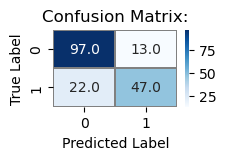

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



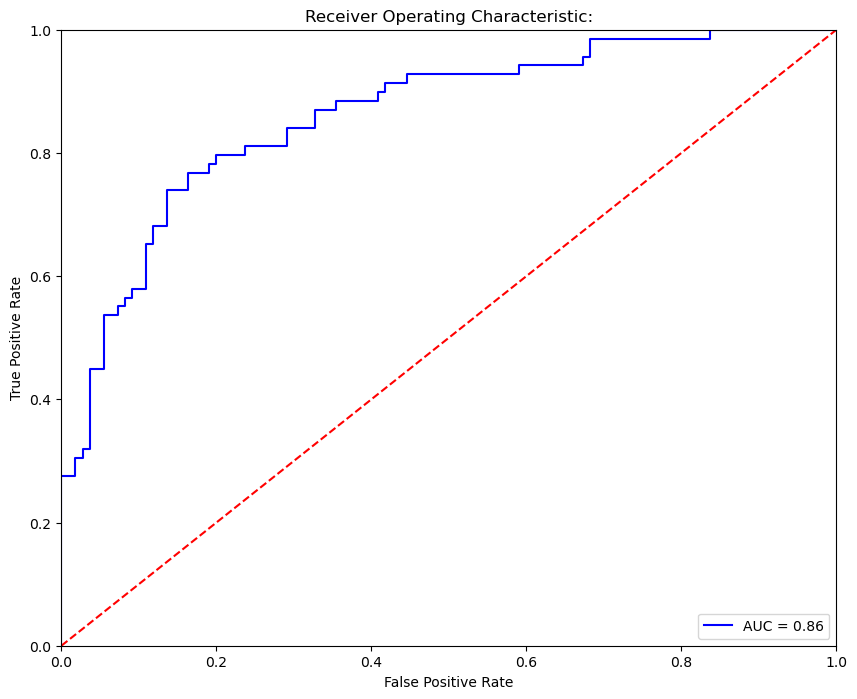

Cross-Validation Scores for: [0.84848485 0.82874332 0.85287433 0.84030749 0.8723574 ]
Mean AUC: 0.8485534762913398
Standard Deviation: 0.0144619505284309


In [66]:
y_pred = logit.predict(X_test)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred) 

# plot the confusion matrix
f,ax = plt.subplots(figsize=(2, 1))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Blues", linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix:")
plt.show()

print(classification_report(y_test,y_pred))

y_probs = logit.predict_proba(X_test)

# Keep probabilities of the positive class only.
y_probs = y_probs[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10,8))
plt.title(f'Receiver Operating Characteristic:')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

 # Perform cross-validation
cv_scores = cross_val_score(logit, inputs, target, cv=5, scoring='roc_auc')
print(f"Cross-Validation Scores for: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores)}")
print(f"Standard Deviation: {np.std(cv_scores)}")

In [80]:
coefficients = logit.coef_[0]
feature_names = X_train.columns 
feature_importance = abs(coefficients)

feature_importance_sorted = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)

for feature, importance in feature_importance_sorted:
    print(f"Feature: {feature}, Importance: {importance}")


Feature: Sex_male, Importance: -2.5068708064804097
Feature: Pclass_3, Importance: -1.8110826478089148
Feature: Pclass_2, Importance: -0.6631003738266472
Feature: port_S, Importance: -0.38196980635884104
Feature: family_members, Importance: -0.26280316278391297
Feature: parents, Importance: -0.1185590826556116
Feature: Age, Importance: -0.035076717580562355
Feature: port_Q, Importance: -0.011982642083199317
Feature: Fare, Importance: 0.005775554406883139
